# Exploratory Data Analysis for the King County Housing Market

Author: Sebastian Nagel

## How to run this notebook

To setup your python environment and download the necessary packages, please run the following commands in your CLI of choice:

```sh
pyenv local 3.9.8
python -m venv .venv
source .venv/bin/activate
pip install --upgrade pip
pip install -r requirements.txt
```

## Aim and scope of this project

### Exploration of the dataset
Clean and explore the dataset, come up with at least 3 hypotheses and generate insights from them.

### Stakeholder
Business task: come up with at least three recommendations for the imaginary stakeholder shown below.
|Name|Stakeholder|Characteristics|
|-|-|-|
|Larry Sanders|Buyer|- waterfront<br>- limited budget<br>- nice & isolated but central neighborhood without kids<br>- but got some of his own, just doesn't his kids to play with other kids|

## Python imports

Packages and modules needed can be installed _via_ CLI using 

```pip install -r requirements.txt```

In [39]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import plotly.express as px
import seaborn as sns
from math import *

sns.set(rc={'axes.facecolor':'black', 
            'figure.facecolor':'black', 
            'text.color': 'white', 
            'axes.labelcolor': 'white', 
            'grid.color': 'black',
            'xtick.color': 'white',
            'ytick.color': 'white'})

## Dataset

### Data adequacy

Provided is a dataset with **21597 rows** over **21 features** containing information on **houses sold in the King County** in **2014** and **2015**. For the sake of the business task, the houses will be considered as active listings instead of houses sold.

Considering the information contained (see table below), the data is considered adequate for this task.

**Column Names and descriptions for King County Data Set**

|Column|Description|
|:-|:-|
|**id**|unique identifier for a house|
|**date**|Date house was listed|
|**price**|Price asked|
|**bedrooms**|# of bedrooms|
|**bathrooms**|# of bathrooms|
|**sqft_living**|squarefootage of the home|
|**sqft_lot**|squarefootage of the lot|
|**floors**|Total floors (levels) in house|
|**waterfront**|House which has a view to a waterfront|
|**view**|Has been viewed|
|**condition**|How good the condition is ( Overall )|
|**grade**|overall grade given to the housing unit, based on King County grading system|
|**sqft_above**|square footage of house apart from basement|
|**sqft_basement**|square footage of the basement|
|**yr_built**|Built Year|
|**yr_renovated**|Year when house was renovated|
|**zipcode**|zip|
|**lat**|Latitude coordinate|
|**long**|Longitude coordinate|
|**sqft_living15**|The square footage of interior housing living space for the nearest 15 neighbors|
|**sqft_lot15**|The square footage of the land lots of the nearest 15 neighbors|

### Data quality and bias

#### Quality
|Characteristic|Details|Pass|
|:-|:-|:-:|
|Reliable|Dataset generated by the government of King County|✔️|
|Original|Dataset downloaded from the government of King County|✔️|
|Comprehensive|Dataset is missing some entries|❌|
|Current|For the sake of this task, the data is considered to be current. Data is from 2014/2015|✔️/❌|
|Cited|Dataset has been used many times and is prominently featured on kaggle.com|✔️|

#### Bias
Since this dataset is simply a representation of the King County housing market, there is arguably no bias.
However, the data collection process is unknown to the author.

## Data cleaning

### Issues

First, the non-null counts and data types are checked for consistency. This gives insights into the dataset's structure and integrity.

Here, null values are found in columns
- waterfront
- view
- yr_renovated

Also, the datatypes for the following columns need to be reviewed and if necessary changed:
- date
- bathrooms
- floors
- waterfront
- view
- sqft_basement
- yr_renovated

Loading the data into a pandas DataFrame for processing (it's not too big. roughly 22k rows x 21 columns).

In [40]:
fp = 'data/kc_house_data.csv'
df_main = pd.read_csv(fp)

In [41]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [42]:
df_main.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Fixing data types and missing/wrong data

After researching the domain, the follwing cleaning is not necessary
- Bathrooms: can be "half a bathroom": then only including e.g. a toilet and a sink --> dtype float and x.5 values are okay!
- Floors: there are "half floors" (basically double-height appartments with an open upper floor) --> dtype float is okay!
- View: cannot simply replace nan with 0, thus will leave as it is.

The following columns will be fixed:
- Date: will be typed as datetime object
- sqft_basement: will be typed as numeric (float), invalid numbers set to nan
- yr_renovated: will be typed as datetime, invalid values set to nan

The following columns should be fixed, but I did not find an automated way to do so:
- Waterfront: nan values can be both, 0 and 1, as can be seen in the map below


In [43]:
df_water = df_main[~(df_main['waterfront'].isin([0, 1]))]
fig = px.scatter_mapbox(df_water[df_water['sqft_basement'] != 0], lat="lat", lon="long", color_discrete_sequence=["blue"], zoom=8.8, height=600, width=600, opacity=1)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

One more thing: there is a house with 33 bedrooms! As amazing as that would be, looking at the price and size, 3 bedrooms sound much more reasonable. Looking at the house in [Google Maps](https://www.google.com/maps/place/47°41'16.1%22N+122°19'51.6%22W/@47.6878322,-122.3311,87m/data=!3m1!1e3!4m5!3m4!1s0x0:0x9aae8baad17e865e!8m2!3d47.6878!4d-122.331) confirms that this is a wrong data entry, and will be changed to "3".

In [44]:
df_main[df_main['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [45]:
# type date column as datetime object
df_main['date'] = pd.to_datetime(df_main['date'], format="%m/%d/%Y")
# type sqft_basement as numeric (will be float, because has NaNs)
df_main['sqft_basement'] = pd.to_numeric(df_main['sqft_basement'], errors='coerce')
# replace 0 with np.nan in yr_renovated (there are only few places renovated)
df_main['yr_renovated'].replace(0, pd.NaT, inplace=True)
df_main['yr_renovated'] = pd.to_datetime(df_main['yr_renovated'], errors='coerce')

# fix bedroom mistake
df_main['bedrooms'][df_main['bedrooms'] == 33] = 3

In [46]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   744 

## Generating insights: Asking and testing hypotheses

### Correlations

First of all, let's check for correlations in the data. If we sort by price, we can immediately see which factors have the highest impact (squarefootage)!

In [47]:
df_main.corr().sort_values(by='price', ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016772,1.000000,0.315954,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.325008,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845
sqft_living,-0.012241,0.701917,0.593182,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.434576,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342
grade,0.008188,0.667951,0.366181,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.168023,0.447865,-0.185771,0.113575,0.200341,0.713867,0.120981
sqft_above,-0.010799,0.605368,0.492549,0.686668,0.876448,0.184139,0.523989,0.075463,0.166299,-0.158904,0.756073,1.000000,-0.052293,0.424037,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_living15,-0.002701,0.585241,0.404540,0.569884,0.756402,0.144763,0.280102,0.088860,0.279561,-0.093072,0.713867,0.731767,0.201579,0.326377,-0.279299,0.048679,0.335626,1.000000,0.183515
bathrooms,0.005162,0.525906,0.527874,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.282693,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303
view,0.011592,0.395734,0.080928,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,0.276521,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332
sqft_basement,-0.004548,0.325008,0.309281,0.282693,0.434576,0.015533,-0.245144,0.090200,0.276521,0.170972,0.168023,-0.052293,1.000000,-0.132844,0.075381,0.110637,-0.145174,0.201579,0.016660
bedrooms,0.002342,0.315954,1.000000,0.527874,0.593182,0.033606,0.183721,-0.002301,0.080928,0.023390,0.366181,0.492549,0.309281,0.160748,-0.158596,-0.011612,0.136574,0.404540,0.031898
lat,-0.001798,0.306692,-0.011612,0.024280,0.052155,-0.085514,0.049239,-0.012772,0.006141,-0.015102,0.113575,-0.001199,0.110637,-0.148370,0.266742,1.000000,-0.135371,0.048679,-0.086139


For a graphical representation, we can use seaborne's pairplot function:

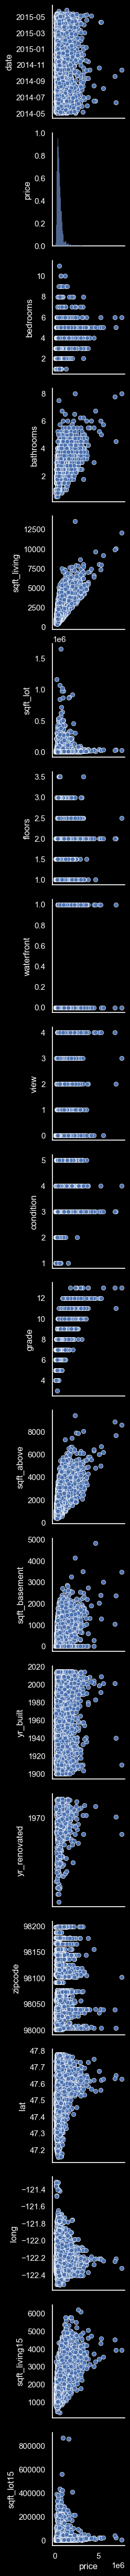

In [48]:
corr = sns.pairplot(data=df_main,
                    y_vars=[x for x in df_main.columns if not x in ['id']],
                    x_vars='price')

### Hypotheses

1. Newer houses are more expensive than comparable older houses (or: the more recent a house was build, the more expensive it is)
    1. Recently renovated houses are more expensive than non-renovated houses of the same build year
1. On average housing in the city center of seattle is smaller (less rooms/sqft) than in the outskirts
1. Housing has generally gotten more expensive in 2015 compared with 2014
1. Mean houseprices are subject to change during the year
1. Houses at the waterfront are more expensive than those not at the water

### Hypothesis 1: Newer houses vs older houses and renovation

Checking general distribution of house prices colored by year built (the darker, the more recent the house was built). Peaks and spread are very similar for all distributions.

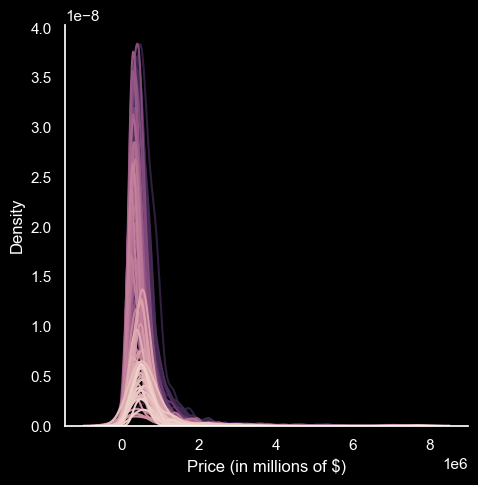

In [49]:
distPlot = sns.displot(df_main, x='price', kind='kde', hue='yr_built')
_ = distPlot.set_xlabels('Price (in millions of $)')
distPlot._legend.remove()

As also displayed in this scatter plot, the average price for a house is not dependent on the year it was build.

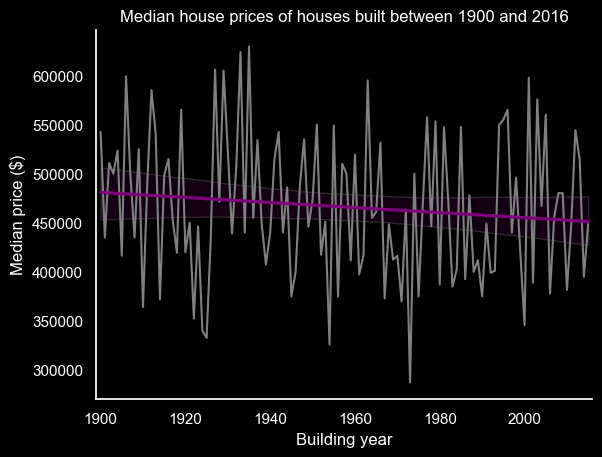

In [50]:
regPlot = sns.lineplot(df_main['yr_built'].unique(), df_main.groupby('yr_built')['price'].median(), color='grey')
regPlot = sns.regplot(df_main['yr_built'].unique(), df_main.groupby('yr_built')['price'].median(), scatter=False, line_kws={'color': 'purple'})
regPlot.set_xlabel('Building year')
regPlot.set_ylabel('Median price ($)')
regPlot.set_title('Median house prices of houses built between 1900 and 2016')
_ = regPlot.set_xlim(1899, 2016)
sns.despine()

Even if the house was recently renovated, there is only a slight change in price.

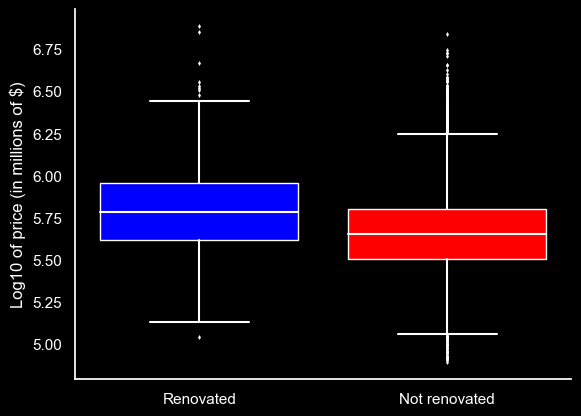

In [51]:
renovated = [log10(x) for idx, x in enumerate(df_main['price']) if not pd.isna(df_main.loc[idx, 'yr_renovated'])]
not_renovated = [log10(x) for idx, x in enumerate(df_main['price']) if pd.isna(df_main.loc[idx, 'yr_renovated'])]

# sanity check
# df_main['yr_renovated'].isna().sum() == len(not_renovated)

reno_df = pd.DataFrame([renovated, not_renovated]).T.rename(mapper={0: 'renovated', 1: 'not_renovated'}, axis=1)
reno_df = reno_df.melt()

# plot results
reno_plot = sns.boxplot(data=reno_df, x='variable', y='value')
reno_plot.set_xlabel('')
reno_plot.set_ylabel('Log10 of price (in millions of $)')
reno_plot.set_xticklabels(['Renovated', 'Not renovated'])

# style the boxplots
reno_plot.patches[0].set_color('blue')
reno_plot.patches[1].set_color('red')

for line in reno_plot.lines:
    line.set_color('white')
    line.set_mfc('white')
    line.set_ms(2.5)
    line.set_mec('black')
    line.set_mew(0)

for patch in reno_plot.patches:
    patch.set_ec('white')
    patch.set_linewidth(1)
    
sns.despine()

### Hypothesis 2: Central homes are smaller than non-central ones

On average, the living space outside of zipcodes 98100-98200 is slightly bigger.

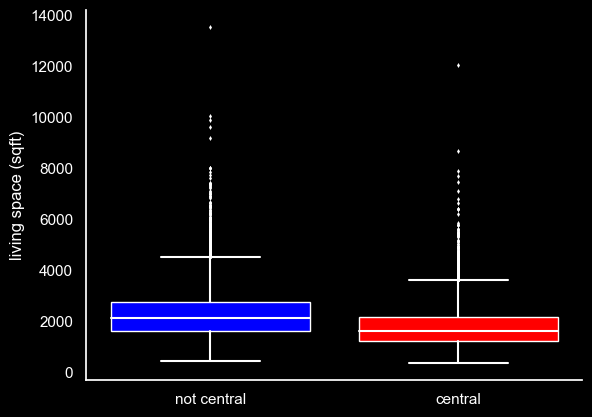

In [52]:
# defining central as homes within the 98100-98200 zipcodes
df_temp = df_main.copy()
df_temp['is_central'] = [True if (x <= 98200 and x >= 98100) else False for x in df_main['zipcode']]

df_temp.sort_values(by='is_central')

fig = sns.boxplot(data=df_temp, y='sqft_living', x='is_central')
fig.set_xlabel('')
fig.set_ylabel('living space (sqft)')
fig.set_xticklabels(['not central', 'central'])

# style the boxplots
fig.patches[0].set_color('blue')
fig.patches[1].set_color('red')

for line in fig.lines:
    line.set_color('white')
    line.set_mfc('white')
    line.set_ms(2.5)
    line.set_mec('black')
    line.set_mew(0)

for patch in fig.patches:
    patch.set_ec('white')
    patch.set_linewidth(1)

sns.despine()

# export figure
# f = fig.get_figure()
# f.savefig('export.png', dpi=300)

The prices are basically the same though:

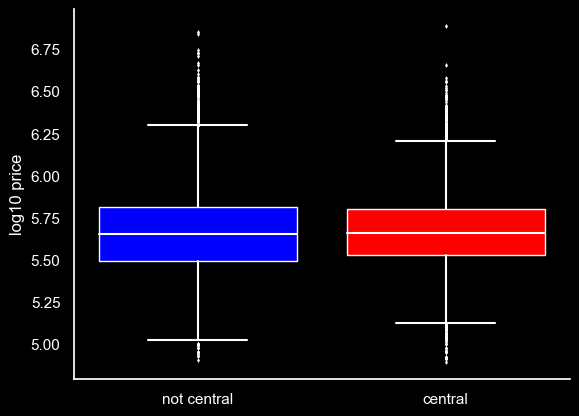

In [53]:
# defining central as homes within the 98100-98200 zipcodes
df_temp = df_main.copy()
df_temp['is_central'] = [True if (x <= 98200 and x >= 98100) else False for x in df_main['zipcode']]
df_temp['log_price'] = df_main['price'].apply(lambda x: log10(x))
df_temp.sort_values(by='is_central')

fig = sns.boxplot(data=df_temp, y='log_price', x='is_central')
fig.set_xlabel('')
fig.set_ylabel('log10 price')
fig.set_xticklabels(['not central', 'central'])

# style the boxplots
fig.patches[0].set_color('blue')
fig.patches[1].set_color('red')

for line in fig.lines:
    line.set_color('white')
    line.set_mfc('white')
    line.set_ms(2.5)
    line.set_mec('black')
    line.set_mew(0)

for patch in fig.patches:
    patch.set_ec('white')
    patch.set_linewidth(1)

sns.despine()

# export figure
# f = fig.get_figure()
# f.savefig('export.png', dpi=300)

### Hypothesis 3: Houses were more expensive in 2015 than in 2014

On average, this was not the case.

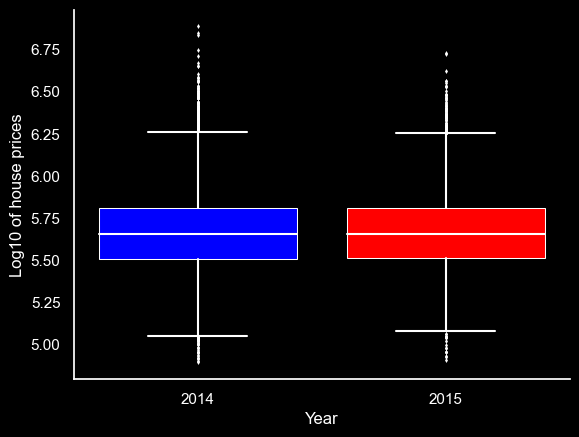

In [54]:
# generate new dataframe
df_prices_by_year = df_main[['id', 'date', 'price']].copy()
df_prices_by_year['log_price'] = [log10(x) for x in df_prices_by_year['price']]
# formate date column to only show years
df_prices_by_year['date'] = df_prices_by_year['date'].dt.year
# plot the results as boxplots
bp = sns.boxplot(data=df_prices_by_year, x='date', y='log_price')
bp.set_xlabel('Year')
bp.set_ylabel('Log10 of house prices')
# xlabels = ['{}'.format(x) + 'M' for x in bp.get_yticks()/1e6]
# bp.set_yticklabels(xlabels)

# style the boxplots
bp.patches[0].set_color('blue')
bp.patches[1].set_color('red')

for line in bp.lines:
    line.set_color('white')
    line.set_mfc('white')
    line.set_ms(2.5)
    line.set_mec('black')
    line.set_mew(0)

for patch in bp.patches:
    patch.set_ec('white')
    patch.set_linewidth(0.75)

sns.despine()

### Hypothesis 4: Seasonal changes of houseprices

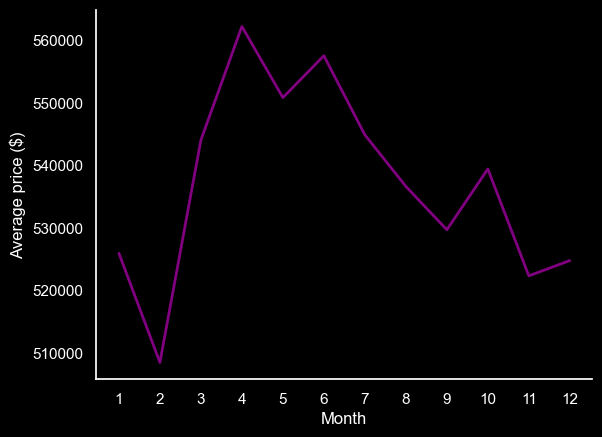

In [55]:
df_temp = df_main.copy()
df_temp['month'] = [x.month for x in df_temp['date']]
df_temp = df_temp.groupby('month')['price'].mean()

sns.set(rc={'axes.facecolor':'black', 
            'figure.facecolor':'black', 
            'text.color': 'white', 
            'axes.labelcolor': 'white', 
            'grid.color': 'black',
            'xtick.color': 'white',
            'ytick.color': 'white'})


fig = sns.lineplot(data=df_temp.reset_index(), x='month', y='price', color='purple', linewidth=2)
fig.set_xlabel('Month')
fig.set_ylabel('Average price ($)')
fig.set_xticks(range(1, 13, 1))

sns.despine()

# f = fig.get_figure()
# f.savefig('export.png', dpi=300)

### Hypothesis 5: Waterfront homes are more expensive than non-waterfront homes

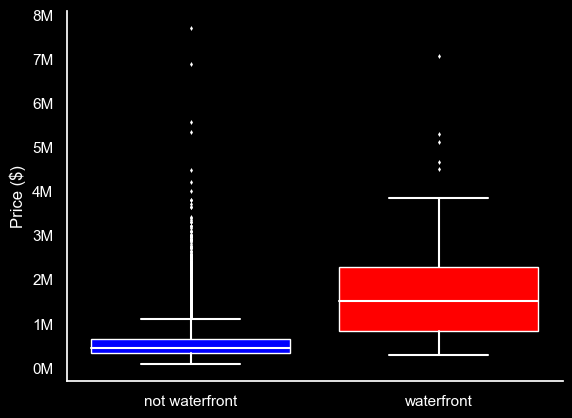

In [56]:
fig = sns.boxplot(data=df_main, x='waterfront', y='price')

fig.set_xticklabels(['not waterfront', 'waterfront'])
fig.set_xlabel('')
fig.set_yticklabels([f"{x}M" for x in range(-1, 10, 1)])
fig.set_ylabel('Price ($)')

# style the boxplots
fig.patches[0].set_color('blue')
fig.patches[1].set_color('red')

for line in fig.lines:
    line.set_color('white')
    line.set_mfc('white')
    line.set_ms(2.5)
    line.set_mec('black')
    line.set_mew(0)

for patch in fig.patches:
    patch.set_ec('white')
    patch.set_linewidth(1)

sns.despine()

# # export figure
# f = fig.get_figure()
# f.savefig('export.png', dpi=300)

## Finding recommendations for stakeholder

Stakeholder wants
1. Waterfront
1. Isolated, nice, central neighborhood w/o kids

Stakeholder has
1. Limited budget
1. Kids

Additional information needed:
1. Priorities: are some wishes more important than others?
1. Budget range: can I assume the median for price per neighborhood?
1. How many kids: how many rooms are needed?

Here, I am assuming the stakeholder provided me with the following answers:
1. Has to be waterfront and central.
1. Budget max is $ 1.5M
1. Needs 4 rooms (2 kids)

### Filtering the dataframe according to his wishes

Let's define what 'central' is by checking out the [zipcodes](https://aqua.kingcounty.gov/gis/web/VMC/boundaries/zipcodes/zipcodes.pdf). Here 'central' is defined as having a zipcode between 98100 and 98200

14 houses match his wishes
- waterfront
- central
- max $1.5M
- at least 4 rooms

In [57]:
df_stakeholder = df_main[
                            (df_main['waterfront'] == 1)
                             & (df_main['price'] < 1500000)
                             & (df_main['zipcode'].between(98101, 98200))
                             & (df_main['bedrooms'] >= 4)
                        ].reset_index().drop('index', axis=1)
df_stakeholder

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8069000075,2014-12-29,790000.0,4,1.75,2460,10061,1.0,1.0,4.0,...,7,1410,1050.0,1961,NaT,98178,47.5105,-122.238,2300,10061
1,623059016,2014-07-17,1100000.0,4,3.25,3190,11774,2.0,1.0,4.0,...,8,2610,580.0,1956,1970-01-01 00:00:00.000001991,98178,47.5033,-122.225,2240,8725
2,7936500190,2014-10-21,1340000.0,4,3.75,2130,34689,1.5,1.0,4.0,...,9,2130,0.0,1955,NaT,98136,47.5489,-122.398,3030,28598
3,7129303045,2015-04-17,949950.0,5,2.50,2340,1989,2.0,1.0,4.0,...,8,2340,0.0,1959,NaT,98118,47.5193,-122.257,2200,3230
4,7567600030,2015-01-27,750000.0,5,1.75,2640,13290,1.0,1.0,4.0,...,8,1400,1240.0,1954,NaT,98178,47.5022,-122.223,2400,11942
5,2623039018,2014-10-27,685000.0,4,1.00,1550,15239,1.5,1.0,4.0,...,6,1370,180.0,1930,NaT,98166,47.4502,-122.378,1790,22047
6,9536600010,2014-12-23,520000.0,4,0.75,1960,8277,1.0,1.0,4.0,...,7,1320,640.0,1923,1970-01-01 00:00:00.000001986,98198,47.3648,-122.325,1940,8402
7,8073000585,2014-07-15,840500.0,4,2.25,2290,12174,1.0,1.0,4.0,...,7,1490,800.0,1948,NaT,98178,47.5114,-122.245,2290,9379
8,8073000491,2014-12-11,700000.0,4,1.75,1950,7139,1.0,1.0,4.0,...,7,1150,800.0,1957,NaT,98178,47.5121,-122.248,1600,13122
9,7351200050,2014-12-18,1340000.0,4,1.75,2300,13342,1.5,1.0,4.0,...,7,2300,0.0,1934,1970-01-01 00:00:00.000001958,98125,47.7308,-122.282,2500,13342


### Plotting the locations

Out of the 14 houses found, 11 are located nicely close to the center. The top one (ID: 7351200050) and bottom two (IDs: 7204200025 and 9536600010) are excluded for now.

In [58]:
fig = px.scatter_mapbox(df_stakeholder, lat="lat", lon="long", 
                        custom_data =['id', 'price', 'zipcode'],
                        color=df_stakeholder['zipcode'].astype('str'),
                        zoom=10, height=600, width=600, opacity=1,
                       )
fig.update_traces(
    hovertemplate="<br>".join([
        "ID: %{customdata[0]}",
        "Price: $%{customdata[1]}",
        "ZIP: %{customdata[2]}",
    ]),
    marker=dict(
                size=13,
               ),
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [59]:
# removing unwanted houses
df_stakeholder = df_stakeholder[~(df_stakeholder['id'].isin([7351200050, 7204200025, 9536600010]))]
df_stakeholder

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8069000075,2014-12-29,790000.0,4,1.75,2460,10061,1.0,1.0,4.0,...,7,1410,1050.0,1961,NaT,98178,47.5105,-122.238,2300,10061
1,623059016,2014-07-17,1100000.0,4,3.25,3190,11774,2.0,1.0,4.0,...,8,2610,580.0,1956,1970-01-01 00:00:00.000001991,98178,47.5033,-122.225,2240,8725
2,7936500190,2014-10-21,1340000.0,4,3.75,2130,34689,1.5,1.0,4.0,...,9,2130,0.0,1955,NaT,98136,47.5489,-122.398,3030,28598
3,7129303045,2015-04-17,949950.0,5,2.50,2340,1989,2.0,1.0,4.0,...,8,2340,0.0,1959,NaT,98118,47.5193,-122.257,2200,3230
4,7567600030,2015-01-27,750000.0,5,1.75,2640,13290,1.0,1.0,4.0,...,8,1400,1240.0,1954,NaT,98178,47.5022,-122.223,2400,11942
5,2623039018,2014-10-27,685000.0,4,1.00,1550,15239,1.5,1.0,4.0,...,6,1370,180.0,1930,NaT,98166,47.4502,-122.378,1790,22047
7,8073000585,2014-07-15,840500.0,4,2.25,2290,12174,1.0,1.0,4.0,...,7,1490,800.0,1948,NaT,98178,47.5114,-122.245,2290,9379
8,8073000491,2014-12-11,700000.0,4,1.75,1950,7139,1.0,1.0,4.0,...,7,1150,800.0,1957,NaT,98178,47.5121,-122.248,1600,13122
10,6117500460,2014-06-30,1310000.0,4,2.50,2680,12215,1.0,1.0,4.0,...,9,1590,1090.0,1956,NaT,98166,47.4396,-122.353,2960,19964
11,6329000190,2014-07-29,750000.0,4,1.75,2520,21834,1.0,1.0,4.0,...,8,1420,1100.0,1960,NaT,98146,47.4996,-122.378,1700,8100


Now regarding his other wishes:
- isolated, nice neighborhood
- no kids

To be "most isolated", the own lot and that of neighbors should be as big as possible. So let's sort for that:

In [60]:
df_top5 = df_stakeholder.sort_values(by='sqft_lot15', ascending=False).head(5).reset_index().drop('index', axis=1)
df_top5['rank'] = list(range(1, 6))
df_top5

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rank
0,7936500190,2014-10-21,1340000.0,4,3.75,2130,34689,1.5,1.0,4.0,...,2130,0.0,1955,NaT,98136,47.5489,-122.398,3030,28598,1
1,7110000068,2014-07-03,975000.0,6,2.75,2520,54160,2.0,1.0,4.0,...,2520,0.0,1954,NaT,98146,47.4969,-122.376,2790,26809,2
2,2623039018,2014-10-27,685000.0,4,1.00,1550,15239,1.5,1.0,4.0,...,1370,180.0,1930,NaT,98166,47.4502,-122.378,1790,22047,3
3,6117500460,2014-06-30,1310000.0,4,2.50,2680,12215,1.0,1.0,4.0,...,1590,1090.0,1956,NaT,98166,47.4396,-122.353,2960,19964,4
4,8073000491,2014-12-11,700000.0,4,1.75,1950,7139,1.0,1.0,4.0,...,1150,800.0,1957,NaT,98178,47.5121,-122.248,1600,13122,5


Let's look at the first five:

In [61]:
fig = px.scatter_mapbox(df_top5, lat="lat", lon="long",
                        custom_data=['rank', 'id', 'price', 'zipcode'], 
                        color=df_top5['zipcode'].astype('str'), 
                        zoom=10, height=600, width=600, opacity=1)

fig.update_traces(hovertemplate="<br>".join(["Rank: %{customdata[0]}",
                                             "ID: %{customdata[1]}",
                                             "Price: $%{customdata[2]}",
                                             "ZIP: %{customdata[3]}",
                                           ]),
                 marker=dict(size=20)
                )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

How about no kids? Let's plot the school sites around the top 5 recommendations:

In [62]:
# load school sites
df_school_sites = pd.read_csv('./data/seattle_schools.csv')

In [63]:
fig = px.scatter_mapbox(df_school_sites, lat="Y", lon="X",
                        custom_data=['schName', 'esmshs'], 
                        color_discrete_sequence=["blue"], 
                        zoom=10, height=600, width=600, opacity=1)

fig.update_traces(hovertemplate="<br>".join(["Name: %{customdata[0]}",
                                             "Type: %{customdata[1]}",
                                           ]),
                 marker=dict(size=5)
                )

fig2 = px.scatter_mapbox(df_top5, lat="lat", lon="long",
                        custom_data=['rank', 'id', 'price', 'zipcode'], 
                        color=df_top5['zipcode'].astype('str'), 
                        zoom=10, height=600, width=600, opacity=1)

fig2.update_traces(hovertemplate="<br>".join(["Rank: %{customdata[0]}",
                                             "ID: %{customdata[1]}",
                                             "Price: $%{customdata[2]}",
                                             "ZIP: %{customdata[3]}",
                                           ]),
                 marker=dict(size=20)
                )

# add the recommendation trace to the first figure
fig2.add_trace(fig.data[0]) 


fig2.update_layout(mapbox_style="open-street-map")
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show()

In [64]:
# calculating the distances of schools for each recommendation in km
R = 6373.0

distances = {}
distance = []

for rec, lat, long in df_top5[['id', 'lat', 'long']].values:
    for slat, slong in df_school_sites[['Y', 'X']].values:
        dlat = radians(abs(slat)) - radians(abs(lat))
        dlong = radians(abs(slong)) - radians(abs(long))

        a = sin(dlat / 2)**2 + cos(lat) * cos(slat) * sin(dlong / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance.append(R * c)

    distances[rec] = distance
    distance = []

for key, val in distances.items():
    val.sort()

pd.DataFrame(distances).head(1)

,7.936500e+09,7.110000e+09,2.623039e+09,6.117500e+09,8.073000e+09
0,1.362426,1.433202,6.618355,8.208806,1.135474


All of those locations have schools around them (no data available outside of Seattle!), but IDs 7936500190, 7110000068, and 8073000491 seem to be the furthest away from any schools.

Thus, my final 3 three recommendations for
- nice, central, isolated neighborhood
- 1.5M budget
- Two kids / 4 bedroom apartment

are IDs 7110000068 ($0.98M), 7936500190 ($1.34M),and 8073000491 ($0.70M)



In [65]:
df_recs = df_top5.copy()
df_recs = df_recs[df_recs['id'].isin([7110000068, 7936500190, 8073000491])]
df_recs

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rank
0,7936500190,2014-10-21,1340000.0,4,3.75,2130,34689,1.5,1.0,4.0,...,2130,0.0,1955,NaT,98136,47.5489,-122.398,3030,28598,1
1,7110000068,2014-07-03,975000.0,6,2.75,2520,54160,2.0,1.0,4.0,...,2520,0.0,1954,NaT,98146,47.4969,-122.376,2790,26809,2
4,8073000491,2014-12-11,700000.0,4,1.75,1950,7139,1.0,1.0,4.0,...,1150,800.0,1957,NaT,98178,47.5121,-122.248,1600,13122,5
